In [46]:
# visualisasi data
import plotly.figure_factory as ff
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# pengolahan data
import pandas as pd
import numpy as np

# pembuatan model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# evaluasi model``
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [28]:
data = pd.read_csv('D:\Code\python_code\Machine-Learning/5210411135\data\waterQuality1.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [30]:
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [31]:
data = data[:1000]
Y = data.iloc[:,20]
X = data.drop(['ammonia', 'is_safe'], axis=1)

In [32]:
# split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=0.3,
                                                    random_state=1)

dimensi = f'dimensi awal\t: {data.shape}\ndimensi x_train\t: {x_train.shape}\ndimensi x_test\t: {x_test.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi awal	: (1000, 21)
dimensi x_train	: (700, 19)
dimensi x_test	: (300, 19)
dimensi y_train	: (700,)
dimensi y_test	: (300,)



In [33]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

In [34]:
print(f'Akurasi model\t: {accuracy_score(y_test,y_pred)}')

Akurasi model	: 0.8666666666666667


### Evaluasi Model

In [35]:
gnb_cf = confusion_matrix(y_test,y_pred)
gnb_cf

array([[ 79,  22],
       [ 18, 181]], dtype=int64)

In [36]:
# Membuat fungsi untuk menampilkan confusion matrix 
def plot_cm(matrix, title): 
    z = matrix 
    x = ['Safe', 'Not'] 
    y = x 
    z_text = [[str(y) for y in x] for x in z] 
    z_text.reverse() 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='blugrn') 
    fig.update_layout( title_text='<i><b>Confusion matrix {}</b></i>'.format(title)) 
    fig.add_annotation({'font':{'color':"black",'size':14}, 'x':0.5, 'y':-0.1, 'showarrow':False, 'text':"", 'xref':"paper", 'yref':"paper"}) 
    fig.add_annotation({'font':{'color':"black",'size':14}, 'x':-0.20, 'y':0.5, 'showarrow':False, 'text':"", 'textangle':-90, 'xref':"paper", 'yref':"paper"}) 
    # Mengatur margin 
    fig.update_layout(margin={'t':50, 'l':20},width=500,height=500) 
    fig['data'][0]['showscale'] = True 
    fig.show()

In [37]:
plot_cm(gnb_cf, 'model')

In [38]:
nb_report = classification_report(y_test,y_pred,output_dict=True, target_names=['Safe','Not'])
pd.DataFrame(nb_report).transpose()

,precision,recall,f1-score,support
Safe,0.814433,0.782178,0.797980,101.000000
Not,0.891626,0.909548,0.900498,199.000000
accuracy,0.866667,0.866667,0.866667,0.866667
macro avg,0.853029,0.845863,0.849239,300.000000
weighted avg,0.865637,0.866667,0.865983,300.000000


In [39]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [nb_report['accuracy']],
                        'precision_0' : [nb_report['Safe']['precision']],
                        'recall_0' : [nb_report['Safe']['recall']],
                        'f1-score_0' : [nb_report['Safe']['f1-score']],
                        'precision_1' : [nb_report['Not']['precision']],
                        'recall_1' : [nb_report['Not']['recall']],
                        'f1-score_1' : [nb_report['Not']['f1-score']]},
                        index=['Naive Bayes Classifier'])

multiheader = [('','accuracy'),
               ('Safe', 'precision'),
               ('Safe', 'recall'),
               ('Safe', 'f1-score'),
               ('Not', 'precision'),
               ('Not', 'recall'),
               ('Not', 'f1-score')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)

# Menampilkan dataframe
metrics

Safe                          Not   
                        accuracy precision    recall f1-score precision   
Naive Bayes Classifier  0.866667  0.814433  0.782178  0.79798  0.891626  \

                                            
                          recall  f1-score  
Naive Bayes Classifier  0.909548  0.900498

### Pipline

In [40]:
pipeline = make_pipeline(StandardScaler(),
                         GaussianNB(priors=None))

In [41]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train,y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(x_train.iloc[train, :], 
                           y_train.iloc[train])
    scores.append(score)
    print('Fold\t\t\t\t\t: %2d\nTraining/Test Split Distribution\t: %s\nAccuracy\t\t\t\t: %.3f\n' % (k+1, np.bincount(y_train.iloc[train]),score))

print(f'\n\nCross Validation Accuracy\t: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Fold					:  1
Training/Test Split Distribution	: [224 406]
Accuracy				: 0.857

Fold					:  2
Training/Test Split Distribution	: [224 406]
Accuracy				: 0.854

Fold					:  3
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.851

Fold					:  4
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.856

Fold					:  5
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.863

Fold					:  6
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.854

Fold					:  7
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.854

Fold					:  8
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.859

Fold					:  9
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.856

Fold					: 10
Training/Test Split Distribution	: [223 407]
Accuracy				: 0.852



Cross Validation Accuracy	: 0.856 +/- 0.003


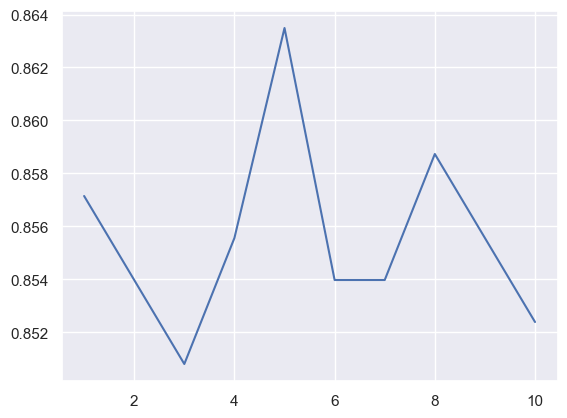

In [47]:
sns.set_theme(style='darkgrid')

x_axis = [1,2,3,4,5,6,7,8,9,10]
y_axis = scores

sns.lineplot(x=x_axis, y=y_axis)
plt.show()